In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import umap
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, plot_roc_curve

In [7]:
df=pd.read_csv('./data/df.csv')
x=df.iloc[:,1:]
y=df.iloc[:,0]

df_umap=pd.read_csv('./data/df_umap.csv')
x_umap=df_umap.iloc[:,1:]

Text(0.5, 1.0, 'Cumulative PCA explained variance ratio')

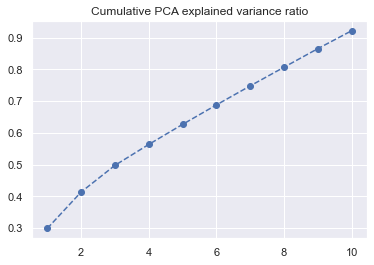

In [8]:
from sklearn.decomposition import PCA

pca=PCA(n_components=0.9)
x_pca=pca.fit_transform(x)
cum_explained_variance_ratio=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 11), cum_explained_variance_ratio,'--o')
plt.title('Cumulative PCA explained variance ratio')

In [17]:
x_train_pca,x_test_pca,y_train,y_test=train_test_split(x_pca,y,random_state=44,test_size=0.2)
x_train_umap,x_test_umap,_,_=train_test_split(x_umap,y,random_state=44,test_size=0.2)

In [34]:
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(max_iter=2000)
estimator.fit(x_train_pca,y_train)
print(cross_val_score(estimator,x_train_pca,y_train,cv=5).mean()) # 0.6240085744908896
print(cross_val_score(estimator,x_test_pca,y_test,cv=5).mean()) # 0.6255456512967242

estimator.fit(x_train_umap,y_train)
print(cross_val_score(estimator,x_train_umap,y_train,cv=5).mean()) # 0.6846730975348339
print(cross_val_score(estimator,x_test_umap,y_test,cv=5).mean()) # 0.6872821980118118

# Significantly decreased accuracy.

0.6240085744908896
0.6255456512967242
0.6846730975348339
0.6872821980118118


In [32]:
from sklearn.svm import SVC
estimator=SVC(C = 1, gamma = 1, kernel = 'rbf')
estimator.fit(x_train_pca,y_train)
print(cross_val_score(estimator,x_train_pca,y_train,cv=5).mean()) # 0.5028938906752412
print(cross_val_score(estimator,x_test_pca,y_test,cv=5).mean()) # 0.5115659733685484

estimator.fit(x_train_umap,y_train)
print(cross_val_score(estimator,x_train_umap,y_train,cv=5).mean()) # 0.7193997856377277
print(cross_val_score(estimator,x_test_umap,y_test,cv=5).mean()) # 0.6958255383148086

# Significantly decreased accuracy.

0.5028938906752412
0.5115659733685484
0.7193997856377277
0.6958255383148086


In [35]:
from sklearn.ensemble import RandomForestClassifier
estimator=RandomForestClassifier(random_state = 1, n_jobs=-1, bootstrap = True, criterion = 'gini', max_depth = 20, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 200)
estimator.fit(x_train_pca,y_train)
print(cross_val_score(estimator,x_train_pca,y_train,cv=5).mean()) # 0.6280814576634512
print(cross_val_score(estimator,x_test_pca,y_test,cv=5).mean()) # 0.642687355562892

estimator.fit(x_train_umap,y_train)
print(cross_val_score(estimator,x_train_umap,y_train,cv=5).mean()) # 0.702465166130761
print(cross_val_score(estimator,x_test_umap,y_test,cv=5).mean()) # 0.6709731851362752

# Decreased accuracy with better robustness.

0.6280814576634512
0.642687355562892
0.702465166130761
0.6709731851362752


In [37]:
import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier
estimator=LGBMClassifier(random_state=1, n_jobs=-1, bagging_fraction=0.6, boosting_type='gbdt', feature_fraction=0.5, learning_rate=0.05, max_depth=20, min_data_in_leaf=20, min_sum_hessian_in_leaf=0.001, n_estimators=50, reg_alpha=10)
estimator.fit(x_train_pca,y_train)
print(cross_val_score(estimator,x_train_pca,y_train,cv=5).mean()) # 0.6366559485530546
print(cross_val_score(estimator,x_test_pca,y_test,cv=5).mean()) # 0.6452404533949598

estimator.fit(x_train_umap,y_train)
print(cross_val_score(estimator,x_train_umap,y_train,cv=5).mean()) # 0.7193997856377277
print(cross_val_score(estimator,x_test_umap,y_test,cv=5).mean()) # 0.6752320164337331

# Decreased accuracy with improved robustness.

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging